# Credit Card Fraud Detection With Machine Learning in Python

### In this project, we detect potential fraud cases in a credit card company, so that the customers are ensured that they won’t be charged for the items they did not purchase. <br>Given a dataset, containing the transactions between people, the information that they are fraud or not, and we will differentiate them as fraud transaction or normal transaction.<br>

### Steps Involved<br>
<li>Importing the required packages into our python environment.
<li>Importing the data
<li>Processing the data to our needs and Exploratory Data Analysis
<li>Feature Selection and Data Split
<li>Building six types of classification models
<li>Evaluating the created classification models using the evaluation metrics

In [2]:
pip install termcolor

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=62c74cee9692c0ab9861b08b88fe5d876b661362ab0280c50d48c6981482a1e5
  Stored in directory: c:\users\abinaya_ub\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

### Importing Data

In [37]:
df = pd.read_csv('datasets/creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())

# It contains features V1 to V28 which are the principal components obtained by PCA. 
# We are going to neglect the time feature which is of no use to build the models. 
# The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted 
# and the ‘Class’ feature that contains whether the transaction is a fraud case or not.

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

### Data Processing and EDA

In [38]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT')
print('Total number of cases are       {}'.format(cases))
print('Number of Non-fraud cases are   {}'.format(nonfraud_count))
print('Number of fraud cases are       {}'.format(fraud_count))
print('Percentage of fraud cases is    {}'.format(fraud_percentage))

# It shows the dataset is highly imbalanced data and we have to balanace it.

CASE COUNT
Total number of cases are       284807
Number of Non-fraud cases are   284315
Number of fraud cases are       492
Percentage of fraud cases is    0.17


In [39]:
nonfraud_cases = df[df.Class == 0]
print(nonfraud_cases.Amount.describe())

# description of amount in non fraud cases.

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [40]:
fraud_cases = df[df.Class == 1]
print(fraud_cases.Amount.describe())

# description of amount in fraud cases.

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


####  It is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python.

In [41]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


### Feature Selection & Data Split

In [42]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Modelling

#### In this step, we will be building six different types of classification models namely 
<li>Decision Tree
<li>K-Nearest Neighbors (KNN)
    <li>Logistic Regression
        <li>Support Vector Machine (SVM)
            <li>Random Forest and XGBoost.

In [44]:
# Decision Tree Model

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# max_depth = 4 which means we are allowing the tree to split four times.
# criterion to be entropy which is most similar to the max_depth but determines when to stop splitting the tree.

In [45]:
# K-Nearest Neighbors

n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# The value of the ‘n_neighbors’ is randomly selected but can be chosen optimistically through iterating a range of values.

In [46]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [47]:
# SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [48]:
# Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# The main difference between the decision tree and the random forest is that, 
#   decision tree uses the entire dataset to construct a single model 
#   whereas, the random forest uses randomly selected features to construct multiple models. 
# That’s the reason why the random forest model is used versus a decision tree.

In [49]:
# XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\Abinaya_UB\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:47:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation of model

#### Our main objective in this process is to find the best model for our given case. The evaluation metrics we are going to use are the accuracy score metric, f1 score metric, and finally the confusion matrix.

### 1) Accuracy Score

#### Accuracy score is one of the most basic evaluation metrics which is widely used to evaluate classification models. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions made by the model (can be multiplied by 100 to transform the result into a percentage).<br>Accuracy score = No.of correct predictions / Total no.of predictions

In [51]:
print('ACCURACY SCORE')
print('------------------------------------------------------------------------')
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('------------------------------------------------------------------------')


# According to the accuracy score evaluation metric, 
#    the KNN model reveals to be the most accurate model.
#    the Logistic regression model to be the least accurate model. 
# However, when we round up the results of each model, it shows 0.99 (99% accurate) which is a very good score.

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994908886626171
------------------------------------------------------------------------


### F1 Score

#### The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 2.<br>F1 score = 2( (precision * recall) / (precision + recall) )

In [53]:
print('F1 SCORE')
print('------------------------------------------------------------------------')
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat))
     )
print('------------------------------------------------------------------------')
print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
print('------------------------------------------------------------------------')


# The ranking of the models is almost similar to the previous evaluation metric. 
# On basis of the F1 score evaluation metric, 
#   the KNN model snatches the first place again 
#   the Logistic regression model remains to be the least accurate model.

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7796610169491525
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8449197860962566
------------------------------------------------------------------------


### Confusion Matrix

#### Confusion matrix is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones. Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table. Using the correlation table, the confusion matrix is plotted in the form of a heatmap. Even though there are several built-in methods to visualize a confusion matrix, we are going to define and visualize it from scratch for better understanding.

In [54]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


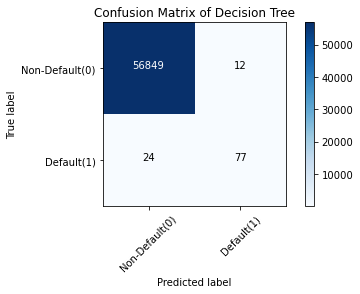

In [55]:
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
#plt.savefig('tree_cm_plot.png')
plt.show()

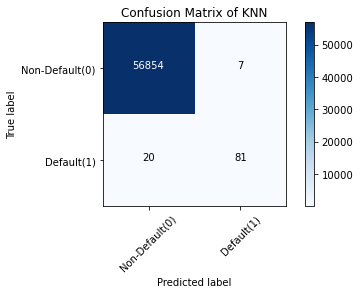

In [56]:
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
#plt.savefig('knn_cm_plot.png')
plt.show()

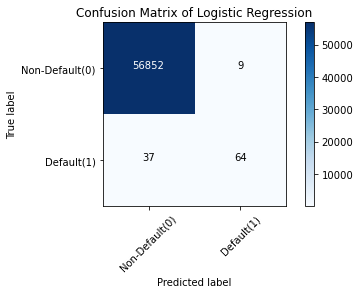

In [57]:
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
#plt.savefig('lr_cm_plot.png')
plt.show()

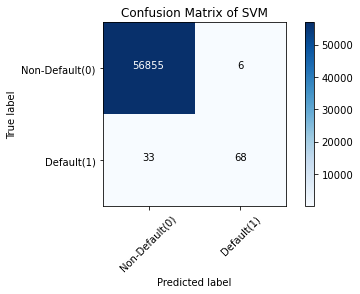

In [58]:
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
#plt.savefig('svm_cm_plot.png')
plt.show()

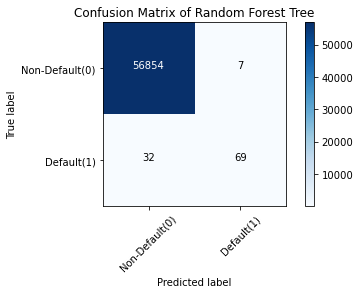

In [59]:
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
#plt.savefig('rf_cm_plot.png')
plt.show()

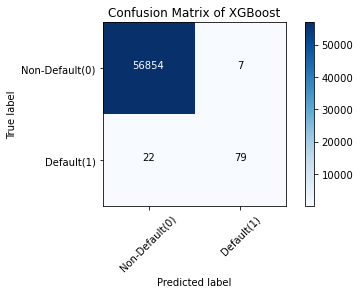

In [60]:
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
#plt.savefig('xgb_cm_plot.png')
plt.show()

### K-Nearest Neighbors model has performed a very good job of classifying the fraud transactions from the non-fraud transactions followed by the XGBoost model. So we can conclude that the most appropriate model which can be used for our case is the K-Nearest Neighbors model and the model which can be neglected is the Logistic regression model.

## After a whole bunch of processes, we have successfully built six different types of classification models starting from the Decision tree model to the XGBoost model. After that, we have evaluated each of the models using the evaluation metrics and chose which model is most suitable for the given case.<br><br>  K-Nearest Neighbors model is the best model for predicting this dataset.